In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("h5py ==", h5py.__version__)
print("numpy ==", np.__version__)
print("matplotlib ==", matplotlib.__version__)
print("tensorflow ==", tf.__version__)

h5py == 3.11.0
numpy == 1.24.2
matplotlib == 3.8.2
tensorflow == 2.16.1


In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
dataset_train = h5py.File("./content/drive/MyDrive/happyDataset/train_happy.h5")
dataset_test = h5py.File("./content/drive/MyDrive/happyDataset/test_happy.h5")

#exploring the dataset
print("Keys: ", dataset_train.keys())
print("Classes: ",dataset_train['list_classes'][:])

#obtaining data in np arrays
x_train_orig = np.array(dataset_train["train_set_x"])
y_train_orig = np.array(dataset_train["train_set_y"])
x_test_orig = np.array(dataset_test["test_set_x"])
y_test_orig = np.array(dataset_test["test_set_y"])

print("shapes: ", x_train_orig.shape, y_train_orig.shape, x_test_orig.shape, y_test_orig.shape)
#we can observe that train set has 600 images and test set has 150 images

Keys:  <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
Classes:  [0 1]
shapes:  (600, 64, 64, 3) (600,) (150, 64, 64, 3) (150,)


In [3]:
#Now we shall preprocess the data a bit
#min-max normalisation
x_train = x_train_orig/255
x_test =x_test_orig/255

#we need to bring y to the shape of output, (m,1)
y_train_orig = y_train_orig.reshape((1,y_train_orig.shape[0]))
y_test_orig = y_test_orig.reshape((1,y_test_orig.shape[0]))
y_train = y_train_orig.T
y_test = y_test_orig.T

print("shapes: ", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[:10])

shapes:  (600, 64, 64, 3) (600, 1) (150, 64, 64, 3) (150, 1)
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]


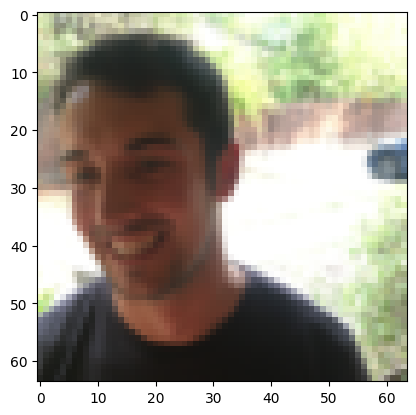

In [12]:
#visualising the input
index = 108
plt.imshow(x_train[index])

In [ ]:
#architecture ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

def happyModel():
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(64,64,3)),
            tfl.ZeroPadding2D(padding=(3,3)),
            tfl.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.ZeroPadding2D(padding=(3,3)),
            tfl.Conv2D(filters=50, kernel_size=(7,7), strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.ZeroPadding2D(padding=(3,3)),
            tfl.Conv2D(filters=70, kernel_size=(7,7), strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.ZeroPadding2D(padding=(3,3)),
            tfl.Conv2D(filters=50, kernel_size=(7,7), strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.ZeroPadding2D(padding=(3,3)),
            tfl.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPooling2D(),
            tfl.Flatten(),
            tfl.Dense(1,activation="sigmoid")
        ]
    )
    return model


In [ ]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [ ]:
happy_model.fit(x_train, y_train, epochs=20, batch_size=12)

Epoch 1/20
50/50 [==============================] - 2s 8ms/step - loss: 0.0075 - accuracy: 0.9967
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.9950
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 0.9883
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.9733
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0485 - accuracy: 0.9800
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0145 - accuracy: 0.9967
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9933
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0582 - accuracy: 0.9833
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.9967
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9967
Epoch 11/20
50/50 [

In [4]:
#loading from the model I trained on colab
# print(x_test[:5], y_test[0:5])
happy_model1 = tf.keras.models.load_model('./happy_model.keras')
happy_model1.evaluate(x_test, y_test)

ValueError: Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['conv2d/kernel:0', 'conv2d/bias:0']

In [15]:
tf.keras.models.save_model(happy_model, 'happy_model2.keras')